# HomeWork 7

**DeadLine : 12:00 PM 19 Aban 1399**

**Total points : 165 pts**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 5A

Here is for your helper functions(optional)

Implement these functions for converting color spaces.

In [3]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2HSV)
    
    return out_img

def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2YCrCb)
    
     
    
    return out_img

Test your implementation (dont change this cell)

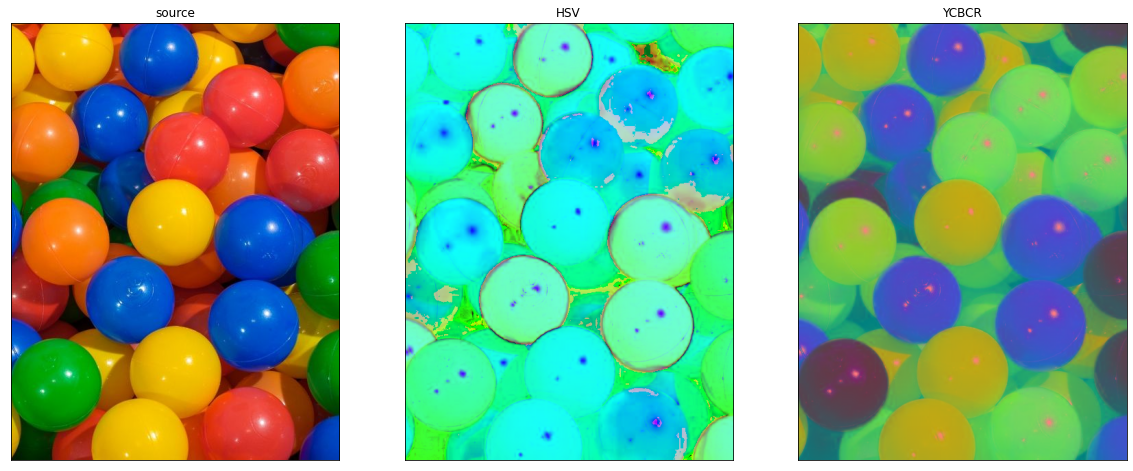

In [4]:
image_list = []

image = cv2.imread(os.path.join('images', '5.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2A')

# PART 5B

Here is for your helper functions(optional)

Implement this function to get differences between two images.

In [5]:
def get_dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    
    out_img = image1.copy()
    
    #Write your code here

    # https://www.programcreek.com/python/example/85133/cv2.merge
    out_img = cv2.merge([image1, image2, image2])
    
    return out_img

Test your implementation (dont change this cell)

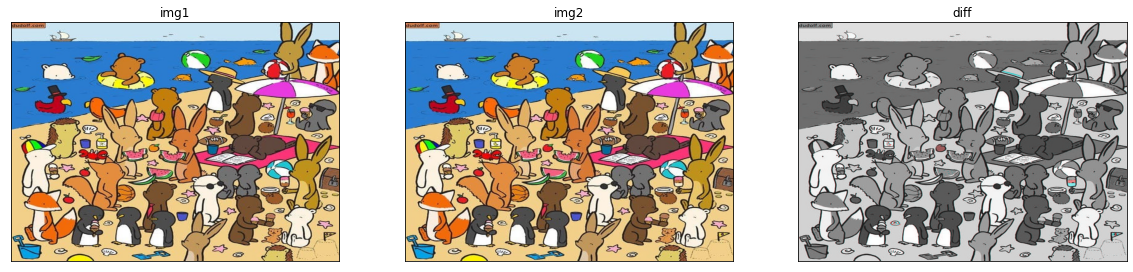

In [6]:
image_list = []

image1 = cv2.imread(os.path.join('images', '5b1.jpg'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images', '5b2.jpg'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images', '5b1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '5b2.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([get_dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')

# PART 6

Here is for your helper functions(optional)

Implement this function to process the input frame.

In [7]:
def process_frame(frame):
    '''
    Converts red circles in the input image to white circles.
    
    Parameters:
        frame (numpy.ndarray): The input frame.
    
    Returns:
        numpy.ndarray: The result output frame.
    '''
    
    result = frame.copy()
    
    #Write your code here
    
    # https://www.tutorialspoint.com/detection-of-a-specific-color-blue-here-using-opencv-with-python
    rows, cols, color = frame.shape
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    low_red1 = np.array([161, 70, 50])
    high_red1 = np.array([179, 255, 255])
    
    low_red2 = np.array([0, 70, 50])
    high_red2 = np.array([10, 255, 255])
    
    red_mask1 = cv2.inRange(hsv_frame, low_red1, high_red1)
    red_mask2 = cv2.inRange(hsv_frame, low_red2, high_red2)

    for row in range(0, rows):
        for col in range(0, cols):
            if red_mask1[row, col] == 255 or red_mask2[row, col] == 255:
                result[row, col] = 255
            
    
    return result

Test your implementation (dont change this cell)

In [8]:
cap = cv2.VideoCapture('balls.mp4')

frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('balls_processed.mp4',  
                         cv2.VideoWriter_fourcc(*'XVID'), 
                         fps, size) 

co = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        out.write(process_frame(frame)) 
        cv2.imwrite(os.path.join('res', str(co) + '.jpg'), process_frame(frame))
        co += 1
    else:
        break
out.release()
cap.release()

KeyboardInterrupt: 

In [ ]:
from IPython.display import HTML

text =  """
<table>
<tr>
    <td>
        <h3>Input</h3>
        <video alt="input" width="400" height="240" autoplay>
            <source src="balls.mp4" type="video/mp4">
        </video>
    </td>
    <td>
        <h3>Processed</h3>
        <video alt="output" width="400" height="240" autoplay>
            <source src="balls_processed.mp4" type="video/mp4">
        </video>
    </td>
</tr>
</table>

"""
HTML(text)

# PART 7

Here is for your helper functions(optional)

In [ ]:
def sobel_filters(image):
    '''
    finds the magnitude and orientation of the image using Sobel kernels.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        (magnitude, theta): A tuple consists of magnitude and orientation of the image gradients.
    '''
    #Writer your code here
    #Took this function from my own implementation in HW5
    
    Kx = np.zeros((3,3), np.float)
    Kx[0,0] = -1
    Kx[1,0] = -2
    Kx[2,0] = -1
    Kx[0,2] = 1
    Kx[1,2] = 2
    Kx[2,2] = 1
    
    Ky = np.zeros((3,3), np.float)
    Ky[0,0] = 1
    Ky[0,1] = 2
    Ky[0,2] = 1
    Ky[2,0] = -1
    Ky[2,1] = -2
    Ky[2,2] = -1
    
    Ix = cv2.filter2D(image, cv2.CV_64F, Kx)
    Iy = cv2.filter2D(image, cv2.CV_64F, Ky)
    
    rows, cols = image.shape
    magnitude = np.zeros((rows,cols), np.float)
    theta = np.zeros((rows,cols), np.float)
    
    return (Ix, Iy)


Implement this function for Harris detection.

In [ ]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    
    #Used this link to implement:  https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    
    #Step One: Horizontal and vertical gradient values
    (Ix, Iy) = sobel_filters(gray)
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    IxIy = Ix * Iy
    

    wthresh = 1     #How far do we want the window be from the center pixel
    data = np.zeros((rows, cols))
    k = 0.05
    
    #Step Two: Calculate R for each pixel
    for i in range(1, rows - 1) :
        for j in range(1, cols - 1) :
            # The window is a matrix filled with ones. So there's no need to convolve and getting the mean is enough
            wxx = np.mean(Ix2[i - wthresh : i + wthresh + 1 , j - wthresh : j + wthresh + 1])
            wyy = np.mean(Iy2[i - wthresh : i + wthresh + 1 , j - wthresh : j + wthresh + 1])
            wxy = np.mean(IxIy[i - wthresh : i + wthresh + 1 , j - wthresh : j + wthresh + 1])
            
            det = (wxx * wyy) - (wxy * wxy)
            trace = wxx + wyy
            R = det - (k * trace * trace)
            data[i, j] = R
            
            
    #Step Three: Non-maximum suppression and thresholding
    R_max = data.max()
    points = []
    threshold = 0.1 * R_max
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            window = data[i - wthresh : i + wthresh + 1 , j - wthresh : j + wthresh + 1]
            wmax = window.max()
            if data[i,j] == wmax and data[i,j] > threshold :
                points.append([i, j])        
    
    
    #Step Four: Mark the points
    pthresh = 7
    for point in points:
        (x, y) = point
        for i in range(x - pthresh, x + pthresh + 1):
            for j in range(y - pthresh, y + pthresh + 1):
                out_img[i, j] = (255,0,0)
    
    
    return out_img

In [ ]:
image_list = []

image = cv2.imread(os.path.join('images', '7.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

image_list.append([harris_points(image), 'harris_points', 'img'])

plotter(image_list,1 , 2, True, 20, 10, '7')

for create proper files for sending in quera run this cell.

In [ ]:
!python notebook_converter.py

End!!!